In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from lieroy import se3
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from recova.recov_plot import plot_covariance

np.set_printoptions(precision=4, linewidth=100)

In [4]:
cov1 = np.identity(6)
cov1[0,0] = 1.0
cov1[1,1] = 10.0
cov1[0,1] = 0
cov1[1,0] = 0

cov2 = np.identity(6)
cov2[0,0] = 10.0

[[ 1.  0.]
 [ 0. 10.]]
[10.  1.]
[[0. 1.]
 [1. 0.]]
Angle: 90.0
[[10.  0.]
 [ 0.  1.]]
[10.  1.]
[[1. 0.]
 [0. 1.]]
Angle: 0.0


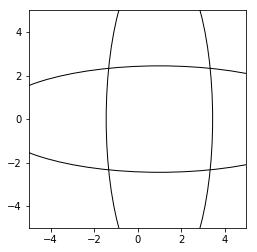

In [8]:
fig, ax = plt.subplots()

mean = np.identity(4)
plot_covariance(mean, cov1, ax, fill=False)

mean[0,3] += 1.0
plot_covariance(mean, cov2, ax, fill=False)

ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])
ax.set_aspect('equal')
plt.show()

In [9]:
fig, ax = plt.subplots()

mean = np.identity(4)
plot_covariance(mean, cov1, ax, fill=False)

mean[0,3] += 1.0
plot_covariance(mean, cov2, ax, fill=False)

mean[0,3] += 1.0
plot_covariance(np.identity(4), rot_cov2, ax, fill=False)
ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])
plt.show()

[[ 1.  0.]
 [ 0. 10.]]
[10.  1.]
[[0. 1.]
 [1. 0.]]
Angle: 90.0
[[10.  0.]
 [ 0.  1.]]
[10.  1.]
[[1. 0.]
 [0. 1.]]
Angle: 0.0


NameError: name 'rot_cov2' is not defined

In [67]:
t1 = np.array([
    [0.0, -1.0, 0.0, 1.0],
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]
])

sigma1 = 0.01 * np.identity(6)
sigma1[0,0] = 1.0
sigma1[5,5] = 0.05

t2 = np.array([
    [1.0, 0.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]
])
sigma2 = 0.01 * np.identity(6)
sigma2[0,0] = 1.0



In [68]:
t, sigma = se3.compound_poses_py(t1, sigma1, t2, sigma2)

In [69]:
sigma

array([[ 1.0034,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  1.0249,  0.    ,  0.    ,  0.    , -0.0099],
       [ 0.    ,  0.    ,  0.0349,  0.    ,  0.0099,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.02  ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.0099,  0.    ,  0.02  ,  0.    ],
       [ 0.    , -0.0099,  0.    ,  0.    ,  0.    ,  0.0599]])

In [64]:
se3.adjoint(t1)

array([[ 0., -1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

In [65]:
se3.adjoint(t1).T

array([[ 0.,  1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  1.]])